https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/analyze-tweet-sentiment-in-python/

https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f


In this notebook we will use python package textblob and VADER sentiment analyzer for sentiment analysis of particular stock. Textblob gives sentiment score in range -1 to 1. values closer to 1 indicate more positive while closer to -1 indicate more negative sentiment.

VADER Sentiment Analysis. VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. The Positive, Negative and Neutral scores represent the proportion of text that falls in these categories. Compound score is used for detrmining tweet as positive negative or neutral.
1. positive sentiment: compound score >= 0.05
2. neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
3. negative sentiment: compound score <= -0.05


* Twitter API Limittion

Twitter api gives limited access to 6-9 days of historical tweets, 18,000 tweets per API call and also to 100 requests per hour, per account.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import re
import tweepy
import copy
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
%matplotlib inline
plt.style.use('dark_background')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


Set up Twitter api

In [ ]:
#keys and tokens from Twitter Dev Console
consumer_key="p04j9bOCPHmi3X74wmwKHYETw"
consumer_secret="JGpyS8h7vDeq9R6o0HlbUFKz5Z54TQJiP95JoSgAad6wVOX7Hp"
access_token="1294181443950665729-aSeFe0FZHLxtFt9cfOipAQHpjAsQCs"
access_token_secret="fvtqdoyaQh26BFQh17409lqHVSg3M3H6viYiXvHHZBojM"


In [ ]:
auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth,wait_on_rate_limit=True)


Grab and clean tweets

In [ ]:
def clean_tweet(tweet):
    "claen tweets using regex by removing links,handles"
    return ' '.join(re.sub("@[A-Za-z0-9]+|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())

Search recent tweets that use the #AAPL hashtag. We will use the .Cursor method to get an object containing tweets containing the hashtag #AAPL.

In [ ]:
# create a custom search term and define number of tweets
search_term="#AAPL -filter:retweets "
tweets=tweepy.Cursor(api.search,q=search_term,lang='en').items(10)
tweets_copy=copy.deepcopy(tweets)
raw_tweets=[tweet.text for tweet in tweets]
# cleaned_tweets
cleaned_tweets=[clean_tweet(tweet.text) for tweet in tweets_copy]

In [ ]:
raw_tweets[0]

'#APeekIntoTheMarkets #AAPL A Peek Into The Markets: US Stock Futures Edge Higher Ahead Of Economic Data, Fed Speake… https://t.co/kp58b9NisR'

In [ ]:
cleaned_tweets[0]

'APeekIntoTheMarkets AAPL A Peek Into The Markets US Stock Futures Edge Higher Ahead Of Economic Data Fed Speake'

In [ ]:
#cleaned_tweets

Analyze Sentiments in tweets

In [ ]:
#using vader sentiment analysis
analyser = SentimentIntensityAnalyzer()
analyser.polarity_scores(cleaned_tweets[0])


{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [ ]:
# create textblob objects for tweets
sentiment_objects=[TextBlob(tweet) for tweet in cleaned_tweets]
# VADER sentiment 
analyser = SentimentIntensityAnalyzer()
# create list of polarity values and tweet text
sentiment_values=[[str(tweet),tweet.sentiment.polarity, analyser.polarity_scores(str(tweet))['compound']] for tweet in sentiment_objects]

# create df
sentiment_df=pd.DataFrame(sentiment_values,columns=['tweet','polarity_textblob','polarity_vader'])


In [ ]:
sentiment_df

,tweet,polarity_textblob,polarity_vader
0,APeekIntoTheMarkets AAPL A Peek Into The Marke...,0.225000,0.0000
1,AAPL AAPL that applefitnessplus bundle just ma...,-0.200000,0.4019
2,NASDAQ dropped to its worst in 5 days as inves...,-1.000000,-0.5267
3,AAPL BillGates Is Elon Musk The New Steve Jobs...,0.136364,-0.2960
4,I currently have positions in AAPL nvda HomeDe...,0.000000,-0.1027
5,Here are some stocks in the Dow Jones near or ...,0.100000,0.2023
6,Trending alts blueprotocol Low total supply to...,0.000000,-0.4019
7,AAPL cloudcomputingsoftwareasaservice Salesfor...,0.000000,-0.3400
8,After 20 years will launch its online store in...,0.000000,0.0000
9,tomorrow morning will be beautiful tsla aapl spy,0.850000,0.5994


In [ ]:
cleaned_tweets[6]

'Trending alts blueprotocol Low total supply token only 42mil just got listed in uniswap don t miss the train'

* Pull tweets every one hour assign time 
* correlated with lagged index


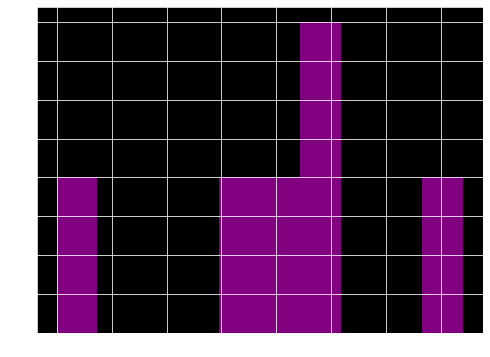

In [ ]:
# Remove polarity values equal to zero
sentiment_df_1 = sentiment_df['polarity_textblob'][sentiment_df.polarity_textblob != 0]
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df_1.hist(
             ax=ax,
             color="purple")

#plt.title("Sentiments from Tweets on AAPL")
plt.show()

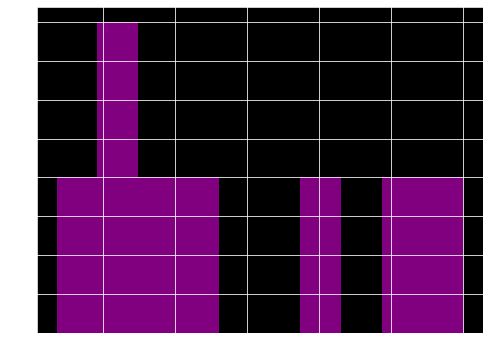

In [ ]:
# Remove polarity values equal to zero
sentiment_df_1 = sentiment_df['polarity_vader'][sentiment_df.polarity_vader != 0]
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df_1.hist(
             ax=ax,
             color="purple")

#plt.title("Sentiments from Tweets on AAPL")
plt.show()